In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import kagglehub


## Import Data

In [41]:
# path = kagglehub.dataset_download("lainguyn123/student-performance-factors",path="StudentPerformanceFactors.csv")
# std_perf = pd.read_csv(path)
# std_perf

std_perf = pd.read_csv("StudentPerformanceFactors.csv")
std_perf

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Describe Column

In [42]:
"""

Hours_Studied                 จำนวนชั่วโมงเรียน
Attendance                    % การเข้าร่วมชั้นเรียน
Parental_Involvement          การมีส่วนร่วมของผู้ปกครอง
Access_to_Resources           การเข้าถึงทรัพยากร
Extracurricular_Activities    กิจกรรมนอกหลักสูตร
Sleep_Hours                   จำนวนชั่วโมงนอน
Previous_Scores               คะแนนรอบก่อน
Motivation_Level              ระดับแรงจูงใจ
Internet_Access               การเข้าถึง Internet
Tutoring_Sessions             การเข้าถึงการสอนพิเศษ
Family_Income                 รายได้ครอบครัว
Teacher_Quality               ประสิทธิภาพครู
School_Type                   ประเภทโรงเรียน
Peer_Influence                อิทธิพลจากเพื่อน
Physical_Activity             กิจกรรมทางกายภาพ
Learning_Disabilities         ความไร้ความสามารถในการเรียนรู้
Parental_Education_Level      การศึกษาของผู้ปกครอง
Distance_from_Home            ระยะห่างจากบ้าน
Gender                        เพศ
Exam_Score                    คะแนนสอบ

"""
std_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [43]:
std_perf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Cleaning Data

In [44]:
std_perf.isnull().any()

Hours_Studied                 False
Attendance                    False
Parental_Involvement          False
Access_to_Resources           False
Extracurricular_Activities    False
Sleep_Hours                   False
Previous_Scores               False
Motivation_Level              False
Internet_Access               False
Tutoring_Sessions             False
Family_Income                 False
Teacher_Quality                True
School_Type                   False
Peer_Influence                False
Physical_Activity             False
Learning_Disabilities         False
Parental_Education_Level       True
Distance_from_Home             True
Gender                        False
Exam_Score                    False
dtype: bool

# Cleaning Data in Teacher Quality

**Use Machine Learning to clean data**

y = Teacher_Quality

x = School_Type

**Create the notnull variable to train Model and the null variable to predict**

In [45]:
teach_q = std_perf[["Teacher_Quality", "School_Type"]]
teach_q_null = teach_q.loc[teach_q["Teacher_Quality"].isnull()]
teach_q_nnull = teach_q.loc[teach_q["Teacher_Quality"].notnull()]
teach_q_nnull

,Teacher_Quality,School_Type
0,Medium,Public
1,Medium,Public
2,Medium,Public
3,Medium,Public
4,High,Public
...,...,...
6602,Medium,Public
6603,High,Public
6604,Medium,Public
6605,Medium,Private


In [46]:
teach_q_null

,Teacher_Quality,School_Type
127,NaN,Public
396,NaN,Public
457,NaN,Public
570,NaN,Private
593,NaN,Private
...,...,...
6414,NaN,Public
6427,NaN,Public
6461,NaN,Public
6579,NaN,Public


**teach_q_nnull**

In [47]:
teach_q_nnull_dumm_x = pd.get_dummies(teach_q_nnull[["School_Type"]], prefix='', prefix_sep='',dtype=int)
teach_q_nnull_dumm_x

,Private,Public
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6602,0,1
6603,0,1
6604,0,1
6605,1,0


In [48]:
teach_q_nnull_y = pd.DataFrame(teach_q_nnull["Teacher_Quality"])
teach_q_nnull_y

,Teacher_Quality
0,Medium
1,Medium
2,Medium
3,Medium
4,High
...,...
6602,Medium
6603,High
6604,Medium
6605,Medium


In [49]:
x_train, x_test, y_train, y_test = train_test_split(teach_q_nnull_dumm_x, teach_q_nnull_y, test_size=0.25, stratify=teach_q_nnull_y)

**Predict teach_q_null**

In [50]:
teach_q_null_dumm_x = pd.get_dummies(teach_q_null[["School_Type"]], prefix='', prefix_sep='',dtype=int)
teach_q_null_dumm_x

,Private,Public
127,0,1
396,0,1
457,0,1
570,1,0
593,1,0
...,...,...
6414,0,1
6427,0,1
6461,0,1
6579,0,1


In [51]:
model = LogisticRegression()
model.fit(x_train, y_train)
Predited_class = model.predict(x_test)
accuracy=accuracy_score(y_test, Predited_class)
print(accuracy)

0.6013472137170851


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Finds The best Model

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils

KNN-5: 0.497857 
KNN-7: 0.497857 
Tree: 0.601347 
Naive Bayes: 0.601347 
Multi Naive Bayes: 0.601347 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine: 0.601347 
Logistic Regressing: 0.601347 
Random Forest: 0.601347 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


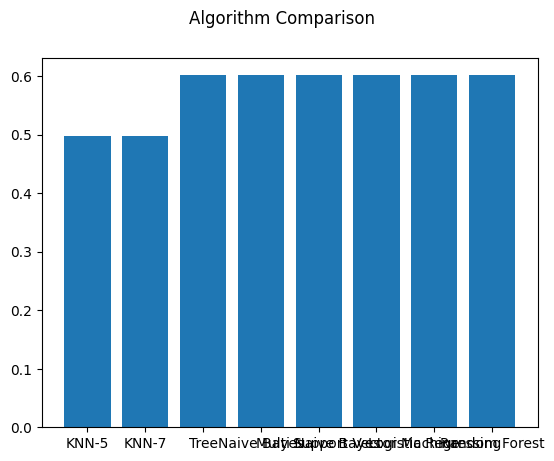

In [52]:
models = []
models.append(('KNN-5', KNeighborsClassifier(n_neighbors= 5)))
models.append(('KNN-7', KNeighborsClassifier(n_neighbors= 7))) 
models.append(('Tree', DecisionTreeClassifier()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("Multi Naive Bayes", MultinomialNB()))
models.append(("Support Vector Machine", SVC()))
models.append(("Logistic Regressing", LogisticRegression()))
models.append(("Random Forest", RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, clf in models:
  model = clf
  model.fit(x_train,y_train)
  Predited_class = model.predict(x_test)
  accuracy=accuracy_score(y_test, Predited_class)
  results.append(accuracy)
  names.append(name)
  msg = "%s: %f " % (name, accuracy)
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names,results)

plt.show()

## Data Visualized

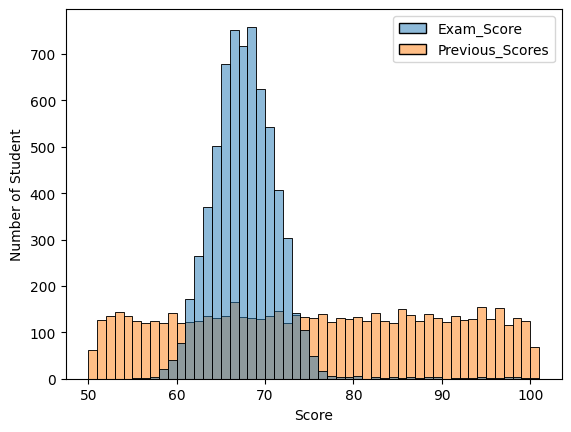

In [53]:
sns.histplot(data = std_perf[["Exam_Score", "Previous_Scores"]])
plt.xlabel("Score")
plt.ylabel("Number of Student")
plt.show()